In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("bank-full.csv")
df.rename(columns={'y':'deposite'},inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposite
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposite
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposite
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposite'],
      dtype='object')

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposite     object
dtype: object

In [8]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposite   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposite     0
dtype: int64

In [12]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposite'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposite
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


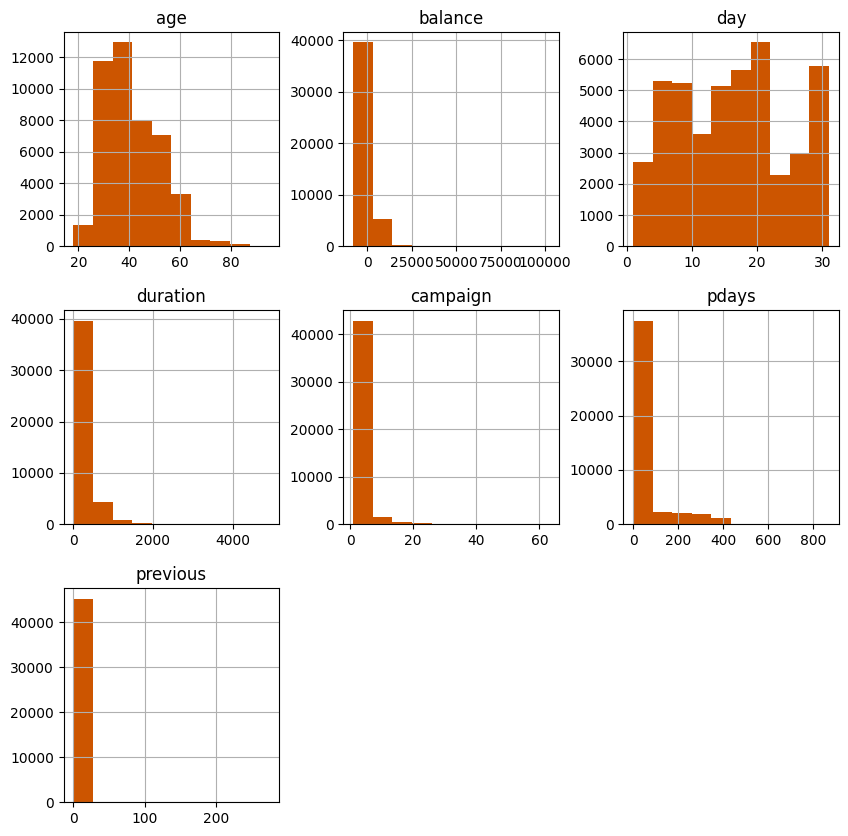

In [15]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()        

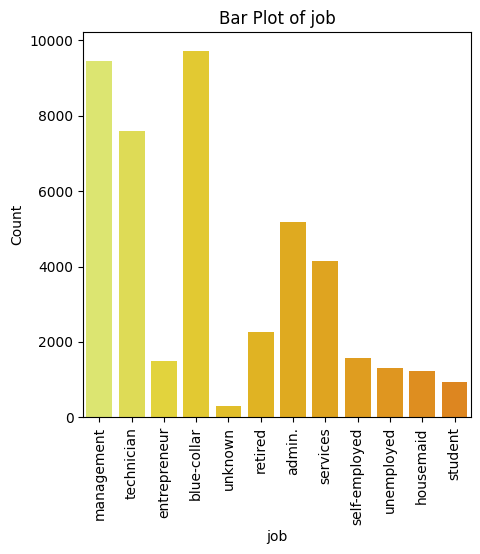

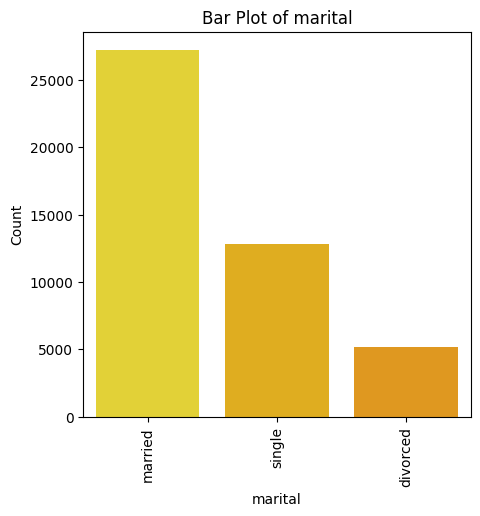

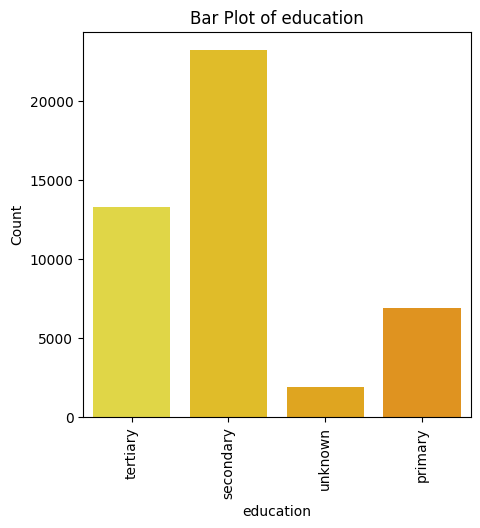

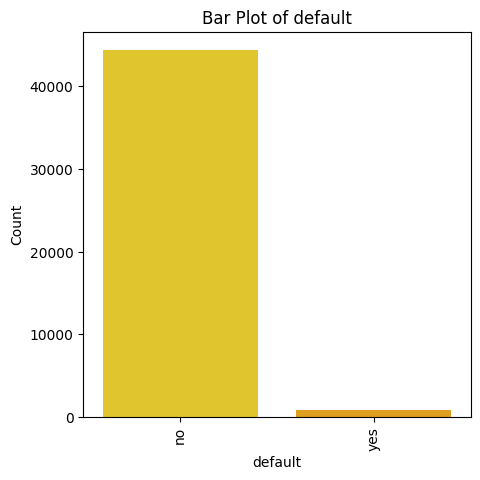

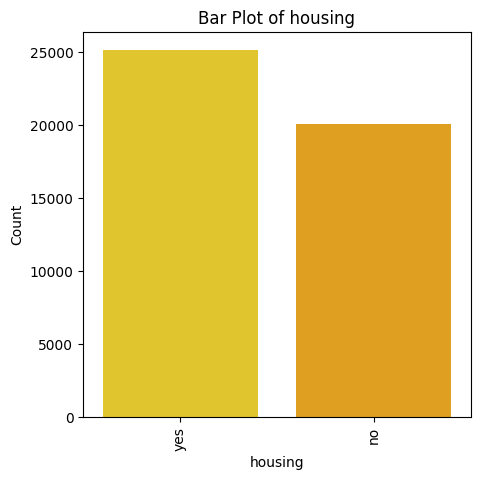

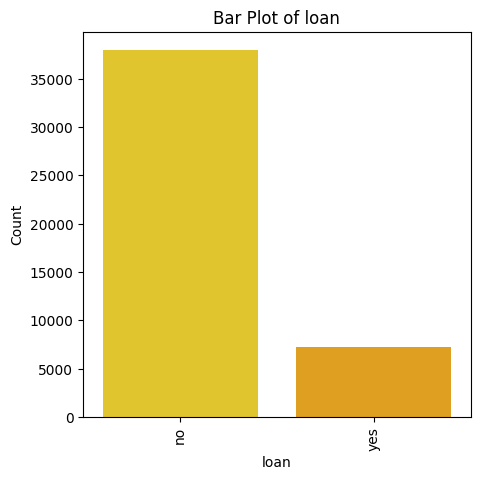

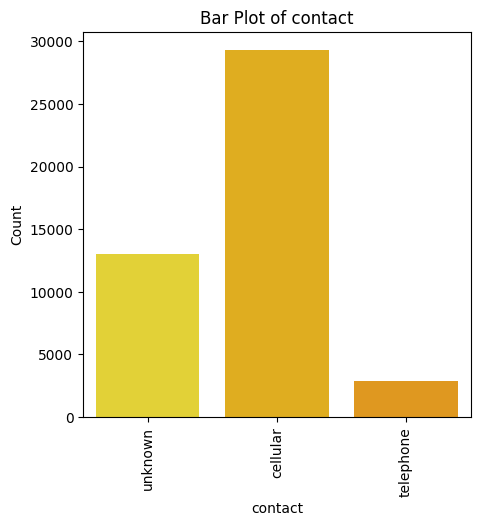

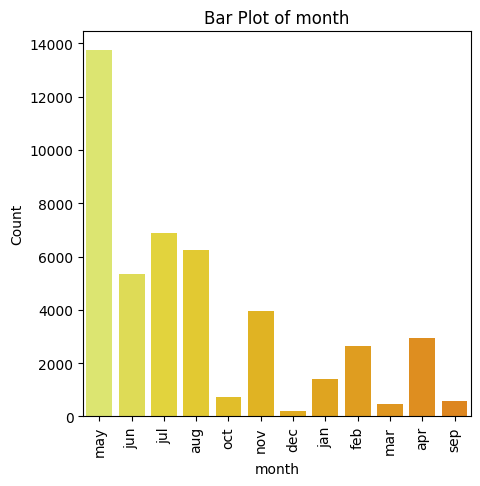

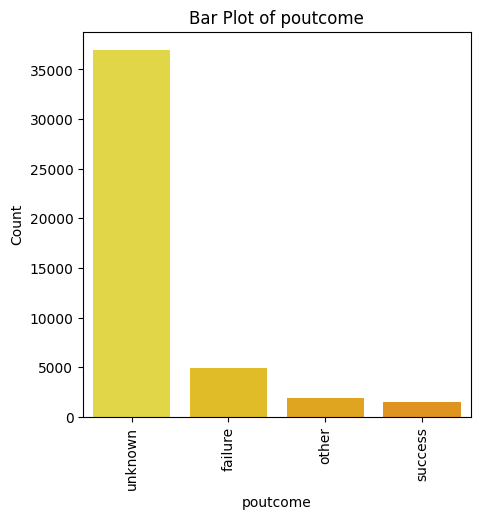

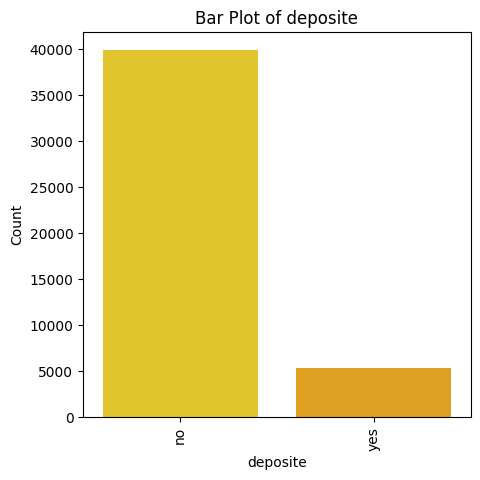

In [16]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df,palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

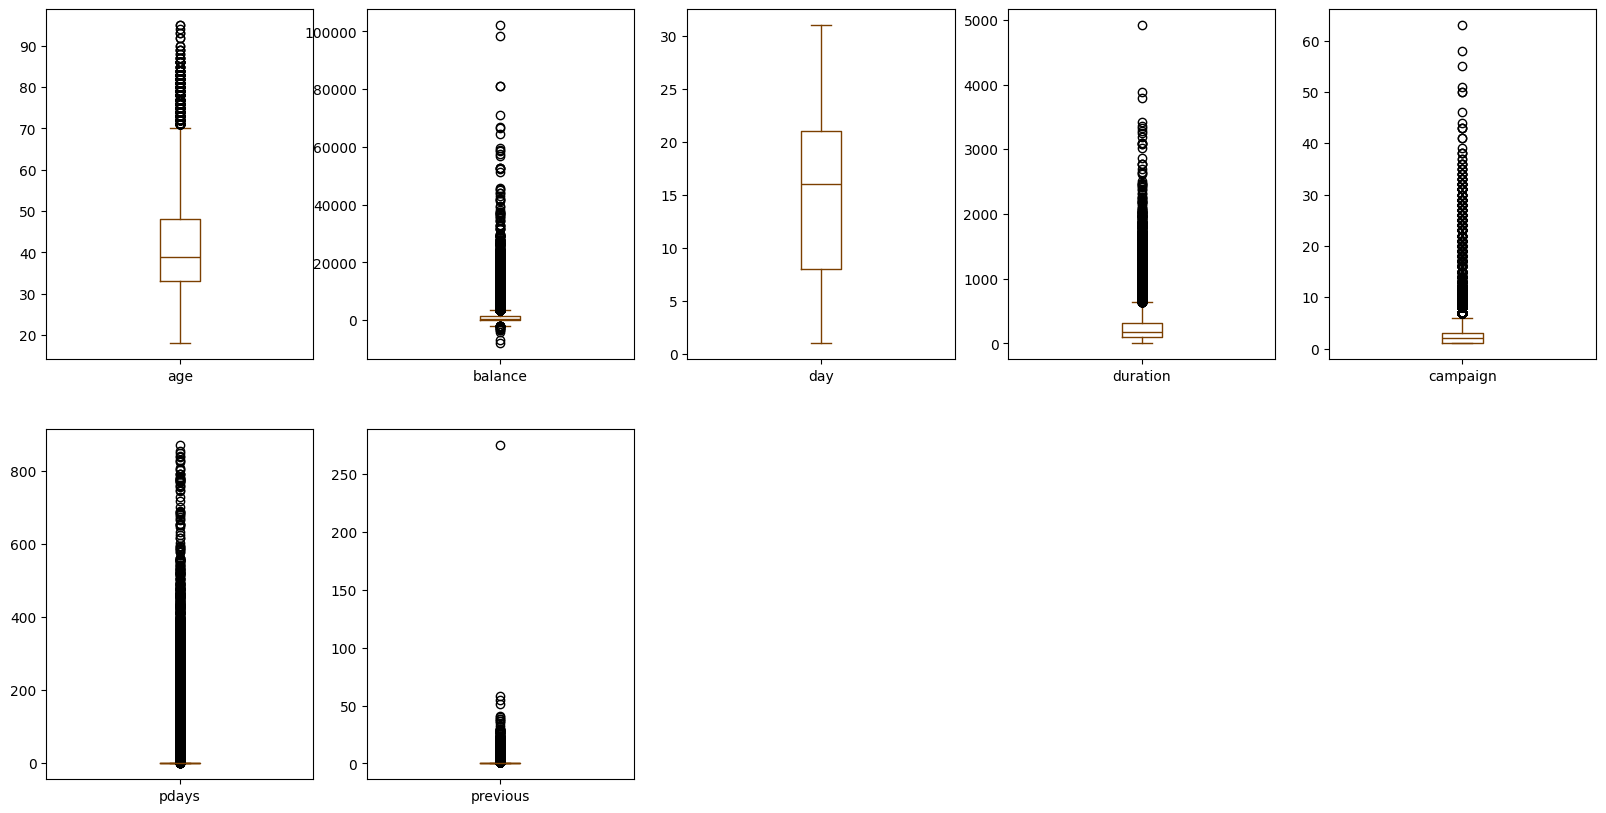

In [17]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [18]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column,25)
q3 = np.percentile(column,75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

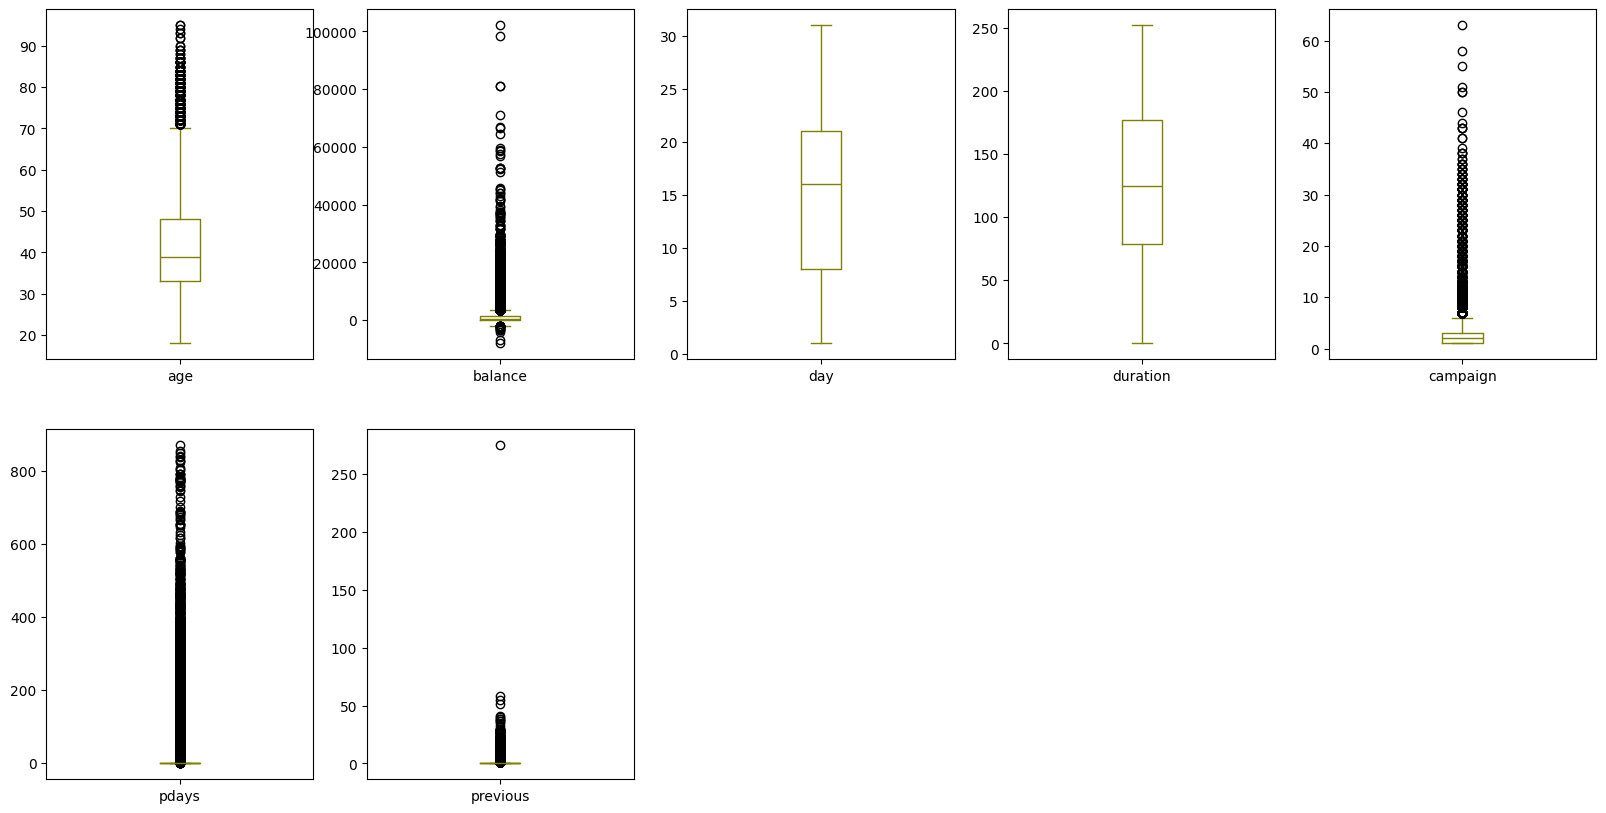

In [19]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.007718  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.007930 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.073588  0.162490 -0.093044 -0.051710
duration -0.007718  0.007930 -0.073588  1.000000 -0.215021  0.017803  0.003690
campaign  0.004760 -0.014578  0.162490 -0.215021  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044  0.017803 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.003690 -0.032855  0.454820  1.000000
          age  balance  day  duration  campaign  pdays  previous
age       1.0      NaN  NaN       NaN       NaN    NaN       NaN
balance   NaN      1.0  NaN       NaN       NaN    NaN       NaN
day       NaN      NaN  1.0       NaN       NaN    NaN       NaN
duration  NaN      NaN  NaN       1.0       NaN    NaN       NaN
campaign  NaN      NaN  NaN       NaN      

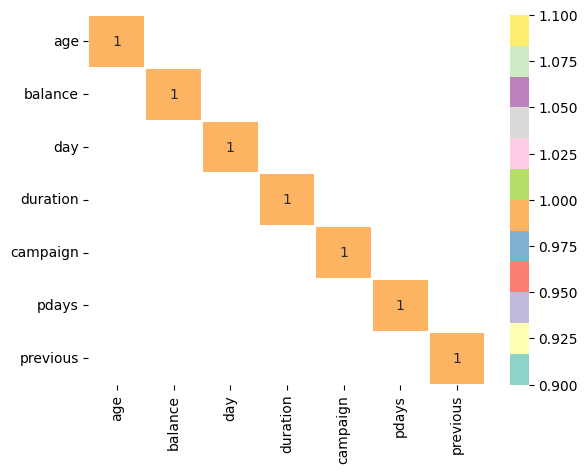

In [20]:
corr = df.corr(numeric_only=True)
print(corr)
filtered_corr = corr[abs(corr) >= 0.90]
print(filtered_corr)
sns.heatmap(filtered_corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [21]:
high_corr_cols = ['duration','pdays','previous']

In [22]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposite'],
      dtype='object')

In [23]:
df1.drop(high_corr_cols,inplace=True,axis=1)  #axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'deposite'],
      dtype='object')

In [24]:
df1.shape

(45211, 14)

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,deposite
0,40,4,1,2,0,3036,1,0,2,4,8,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,2,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,1,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,4,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,3,3,0


In [26]:
df_encoded['deposite'].value_counts()

deposite
0    39922
1     5289
Name: count, dtype: int64

In [27]:
x = df_encoded.drop('deposite',axis=1)
y = df_encoded['deposite']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(45211, 13)
(45211,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 13)
(11303, 13)
(33908,)
(11303,)


In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy_score",acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score =  model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training score',train_score)
    print('Testing Score',test_score)
    

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [38]:
mscore(dt)

Training score 0.8930046006842043
Testing Score 0.890913916659294


In [40]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [41]:
eval_model(y_test,ypred_dt)

Accuracy_score 0.890913916659294
Confusion Matrix
 [[9850  148]
 [1085  220]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9998
           1       0.60      0.17      0.26      1305

    accuracy                           0.89     11303
   macro avg       0.75      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



In [42]:
from sklearn.tree import plot_tree

In [43]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'poutcome'],
      dtype='object')
['no', 'yes']


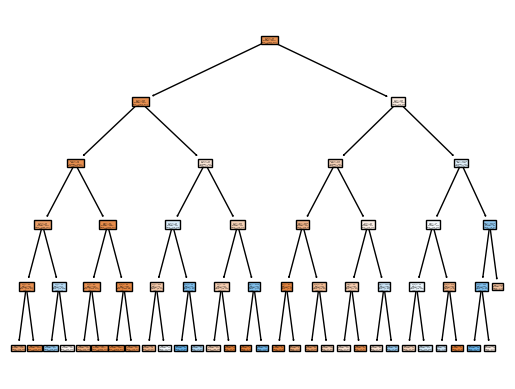

In [44]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [46]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [47]:
mscore(dt1)

Training score 0.884894420195824
Testing Score 0.8824205963018668


In [48]:
ypred_dt1 = dt1.predict(x_test)

In [49]:
eval_model(y_test,ypred_dt1)

Accuracy_score 0.8824205963018668
Confusion Matrix
 [[9883  115]
 [1214   91]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9998
           1       0.44      0.07      0.12      1305

    accuracy                           0.88     11303
   macro avg       0.67      0.53      0.53     11303
weighted avg       0.84      0.88      0.84     11303



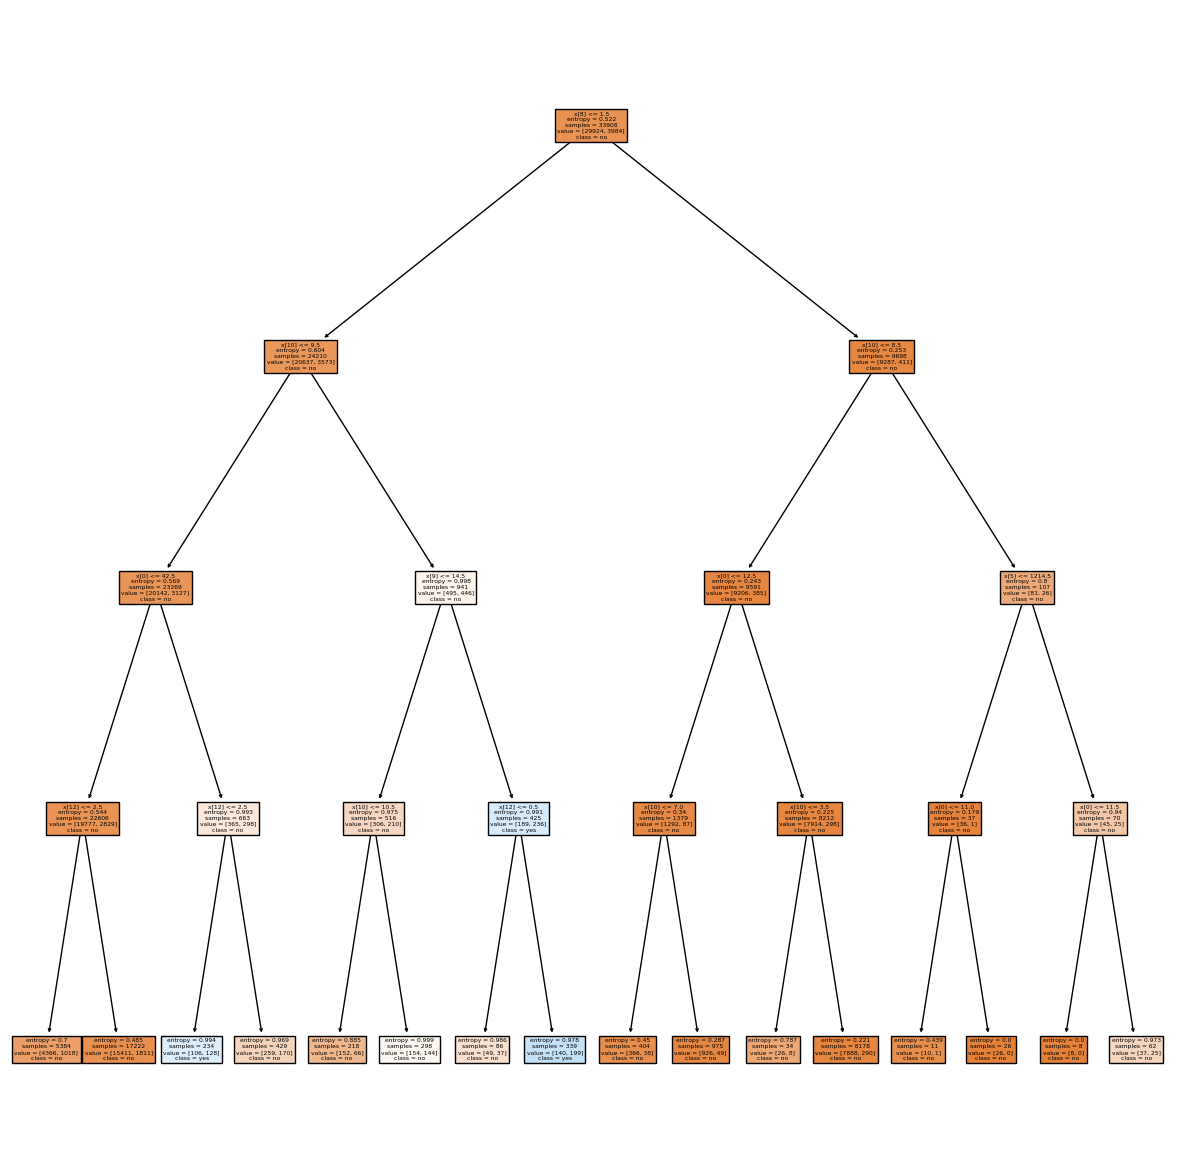

In [50]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()